In [1]:
### Economic Development Capstone

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import hashlib
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statistics

%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format #Stop displaying scientific notation

### Load Data:

In [2]:
df_suc = pd.read_csv("edp_closed.csv") #Closed projects
df_can = pd.read_csv("edp_cancelled.csv") #Cancelled projects
df_wip = pd.read_csv("edp_under_contract.csv") #Projects in progress
df_ct = pd.read_csv("ct_data.csv")
df_ny = pd.read_csv("ny_data.csv", thousands=',')

### Rename Columns

In [3]:
#Iowa Successful Projects
df_suc.rename({'Company Name': 'company_name', 'County': 'county', 'City':'city', 'Status': 'status', 'Program':'program', 'Primary Funding Agreement':'primary_funding',
              'Award Date':'award_date', 'Total Project Cost':'total_project_cost', 'Capital Investment':'company_funding',
              'Direct Assistance Awarded':'direct_assistance_awarded','Tax Benefits Awarded':'tax_benefits_awarded',
              'Projected Jobs - Created':'projected_jobs_created', 'Projected Jobs - Retained':'projected_jobs_retained', 'Projected Jobs - Other': 'p_jobs_other', 'Projected Jobs - Total': 'p_jobs_total',
              'Projected Qualifying Wage': 'p_qualwage', 'Contracted Jobs - Created':'cont_jobs_created',
              'Contracted Jobs - Retained':'cont_jobs_retained', 'Contracted Jobs - Other Created':'cont_jobs_othercreated',
              'Contracted Jobs - Total':'cont_jobs_total', 'Contracted Qualifying Wage':'cont_qualwage',
              'Verified Total Project Cost':'verified_total_project_cost', 'Project Completion Date':'project_completion_date',
              'Final Jobs - Created':'final_jobs_created', 'Final Jobs - Retained':'final_jobs_retained',
              'Final Jobs - Other Created':'final_jobs_other_created', 'Final Jobs - Total':'final_jobs_total',
              'Project Maintenance Date':'project_maintenance_date', 'City Coordinates':'city_coordinates'}, axis=1, inplace=True)

In [4]:
#Iowa Cancelled/Failured Projects
df_can.rename({'Company Name': 'company_name', 'County': 'county', 'City':'city', 'Status': 'status', 'Program':'program', 'Primary Funding Agreement':'primary_funding',
              'Award Date':'award_date', 'Total Project Cost':'total_project_cost', 'Capital Investment':'company_funding',
              'Direct Assistance Awarded':'direct_assistance_awarded','Tax Benefits Awarded':'tax_benefits_awarded',
              'Projected Jobs - Created':'projected_jobs_created', 'Projected Jobs - Retained':'projected_jobs_retained', 'Projected Jobs - Other': 'p_jobs_other', 'Projected Jobs - Total': 'p_jobs_total',
              'Projected Qualifying Wage': 'p_qualwage', 'Contracted Jobs - Created':'cont_jobs_created',
              'Contracted Jobs - Retained':'cont_jobs_retained', 'Contracted Jobs - Other Created':'cont_jobs_othercreated',
              'Contracted Jobs - Total':'cont_jobs_total', 'Contracted Qualifying Wage':'cont_qualwage',
              #'Verified Total Project Cost':'verified_total_project_cost', 'Project Completion Date':'project_completion_date',
              #'Final Jobs - Created':'final_jobs_created', 'Final Jobs - Retained':'final_jobs_retained',
              #'Final Jobs - Other Created':'final_jobs_other_created', 'Final Jobs - Total':'final_jobs_total',
              #'Project Maintenance Date':'project_maintenance_date',
            'City Coordinates':'city_coordinates'}, axis=1, inplace=True)

In [5]:
#Iowa In-Progress Projects
#Note contacted qualifying wage instead of contracted
df_wip.rename({'Company Name': 'company_name', 'County': 'county', 'City':'city', 'Status': 'status', 'Program':'program', 'Primary Funding Agreement':'primary_funding',
              'Award Date':'award_date', 'Total Project Cost':'total_project_cost', 'Capital Investment':'company_funding',
              'Direct Assistance Awarded':'direct_assistance_awarded','Tax Benefits Awarded':'tax_benefits_awarded',
              'Projected Jobs - Created':'projected_jobs_created', 'Projected Jobs - Retained':'projected_jobs_retained', 'Projected Jobs - Other': 'p_jobs_other',
              'Projected Jobs - Total': 'p_jobs_total',
              'Projected Qualifying Wage': 'p_qualwage', 'Contracted Jobs - Created':'cont_jobs_created',
              'Contracted Jobs - Retained':'cont_jobs_retained', 'Contracted Jobs - Other Created':'cont_jobs_othercreated',
              'Contracted Jobs - Total':'cont_jobs_total', 'Contacted Qualifying Wage':'cont_qualwage',
              'Verified Total Project Cost':'verified_total_project_cost', 'Project Completion Date':'project_completion_date',
              'Final Jobs - Created':'final_jobs_created', 'Final Jobs - Retained':'final_jobs_retained',
              'Final Jobs - Other Created':'final_jobs_other_created', 'Final Jobs - Total':'final_jobs_total',
              'Project Maintenance Date':'project_maintenance_date', 'City Coordinates':'city_coordinates',
              'Date Reported':'date_reported',
              'Project Completion Jobs - Created':'end_of_project_completion_jobs_created',
                'Project Completion Jobs - Retained':'end_of_project_completion_jobs_retained',
                'Project Completion Jobs - Other Created':'end_of_project_completion_jobs_others_created',
                'Project Completion Jobs - Total':'end_of_project_completion_jobs_total',
                'Reported Jobs - Created':'reported_jobs_created',
                'Reported Jobs - Retained':'reported_jobs_retained',
                'Reported Jobs - Other Created':'reported_jobs_others_created',
                'Reported Jobs - Total':'reported_jobs_total',}, axis=1, inplace=True)
#print(df_wip.columns)

In [6]:
#Rename columns
df_ct.rename({'Fiscal Year': 'fiscal_year', 'Company Name': 'company_name', 'Company Address':'company_address',
               'Municipality': 'municipality', 'County 1':'county', 'State':'state',
              'Zip Code':'zip_code', 'Business Industry':'company_industry', 'NAICS Code':'naics_code',
              'Minority/ Woman/ Veteran/ International Export':'min_wom_vet_int','Contract Execution Date':'contract_execution_date',
              'Grant Amount':'grant_amount', 'Loan Amount':'loan_amount',
              'Total Project Cost': 'total_project_cost','Amount Leveraged':'company_funding',
              'Funding Source':'program', 'Statutory Reference':'stat_ref',
              'Per Contract: Full-Time CT Jobs to be Retained':'p_ft_job_retention',
              'Per Contract: Full-Time CT Jobs to be Created':'p_ft_job_creation',
              'Per Contract: Part-Time CT Jobs to be Retained':'p_pt_job_retention',
              'Per Contract: Part-Time CT Jobs to be Created':'p_pt_job_creation',
              'Actual Jobs at Time of Review':'actual_jobs', 'Job Obligation Status':'status',
              'Penalty (if applicable)':'penalty', 'Forgiveness Earned (if applicable)':'forgiveness',
              'Per Application: Existing Full-Time Jobs in CT':'existing_ft_jobs',
              'Per Application: Full-Time Jobs to be Created in CT':'original_ft_job_creation',
              'Per Application: Existing Part-Time Jobs in CT':'existing_pt_jobs',
              'Per Application: Part Time Jobs to be Created in CT':'original_pt_job_creation',
              'Full-Time CT Employment at 6/30/20':'full_time_630',
              'Part-Time CT Employment at 6/30/20':'part_time_630',
              'Status':'project_success_failure', 'Location 1':'location1', 'Count':'count',
              'Geocoded Location':'geo_location', 'Planning Regions':'planning_region',
              'Counties':'counties', 'Zip Code 2':'zipcode2', 'Town Index':'town_index',
              'Total Assistance ':'tot_assistance'
              }, axis=1, inplace=True)

In [7]:
#Rename columns
df_ny.rename({'Project\n ID #': 'project_id', 'Recipient Name': 'company_name', 'Project Address':'company_address',
               'Project Name': 'project_name', 'Project Description':'project_description', 'County':'county',
              'Postal Code':'zip_code', 'Industry':'business_industry', 'Region':'region',
              'Start Date':'start_date','End Date':'end_date',
              'Assistance Type':'assistance_type', 'Total ESD Assistance Awarded':'total_esd_award',
              'Total Public-Private Investment': 'total_project_cost','Disbursements\n To-Date':'disbursements_to_date',
              'Compliant?':'compliant', 'Reason for Non-Compliant Status':'reason_for_noncompliance',
              'Penalties Applied':'penalties_applied',
              'Rationale for Termination':'rationale_for_term',
              'Job Creation Commitments':'projected_jobs_created',
              'Job Retention Commitments':'projected_jobs_retained',
              'Jobs Created To-Date':'final_jobs_created', 'Jobs Retained \nTo-Date':'final_jobs_retained',
              'Project Hires':'project_hires', 'Project Status':'status'
              }, axis=1, inplace=True)

## Create Derived Columns

In [8]:
#Fixing CT's df to remove the 9 projects not in that state
df_ct = df_ct[df_ct['state'] == 'CT']
df_ct['state'].value_counts()

CT    2175
Name: state, dtype: int64

In [9]:
#Setting state for each df

df_suc['state'] = 'IA'
df_can['state'] = 'IA'
df_wip['state'] = 'IA'
df_ct['state'] = 'CT' #CT already has state defined
df_ny['state'] = 'NY'

In [10]:
#Direct Assistance Awarded for CT
df_ct['direct_assistance_awarded'] = df_ct['grant_amount'] + df_ct['loan_amount']

#Tax Benefits Awarded for CT
#CT does not award tax benefits
df_ct['tax_benefits_awarded'] = 0

In [11]:
#Direct Assistance Awarded for NY

#Create a tmp filtered version
df_ny_tmp = df_ny[df_ny['assistance_type'] == 'Grant']
#df_ny_tmp['assistance_type'].value_counts()

In [12]:
#Use that filtered version to create the new column
df_ny['direct_assistance_awarded'] = (df_ny_tmp['total_esd_award'])
df_ny['direct_assistance_awarded'] = df_ny['direct_assistance_awarded'].fillna(0)

#df_ny['direct_assistance_awarded'].value_counts()

In [13]:
#Tax Benefits Awarded for NY

#Create a tmp filtered version
df_ny_tmp = df_ny[df_ny['assistance_type'] == 'Tax Credit']

#Use that filtered version to create the new column
df_ny['tax_benefits_awarded'] = (df_ny_tmp['total_esd_award'])
df_ny['tax_benefits_awarded'] = df_ny['tax_benefits_awarded'].fillna(0)

In [14]:
#Program for NY
#NY doesn't classify by program so we'll make one up
df_ny['program'] = 'ESG Assistance Program'

In [15]:
#If total_project_cost is 0, make it equal the value of the tax credit
#REVISIT, need to fix this

#df_ny_tmp = df_ny[df_ny['total_project_cost'] == '0'].copy()
#df_ny_tmp['total_project_cost']=df_ny['total_esd_award']
#df_ny['total_project_cost'] = df_ny_tmp['total_project_cost']

#If it's still 0, drop the row
#df_ny_tmp = df_ny_tmp[df_ny_tmp['total_project_cost'] != 0]

In [16]:
#Final Jobs Created in NY
#Drop the columns that don't have final jobs created (they have no predictive value)
df_ny = df_ny.dropna(subset=['final_jobs_created'])
df_ny = df_ny.dropna(subset=['final_jobs_retained'])
df_ny

,project_id,company_name,project_name,project_description,company_address,county,zip_code,region,business_industry,start_date,...,rationale_for_term,projected_jobs_created,projected_jobs_retained,final_jobs_created,final_jobs_retained,project_hires,state,direct_assistance_awarded,tax_benefits_awarded,program
11,"123,632",Bandalier Inc.,Bandalier Excelsior,"Tax Credit, Professional, Scientific, and Tech...",120 Hawley St,Broome,13901,Southern Tier,"Professional, Scientific, and Technical Services",01/09/2018,...,NaN,1200.00,0.00,0.00,0.00,NaN,NY,0.00,2741813.00,ESG Assistance Program
12,"125,708",Lactalis American Group Inc,Lactalis American Capital,"Tax Credit, Manufacturing, Western New York, L...",2376 S Park Ave,Erie,14220,Western New York,Manufacturing,01/09/2018,...,NaN,4.00,598.00,0.00,598.00,NaN,NY,0.00,344865.00,ESG Assistance Program
13,"129,058","Macmillan Holdings, LLC",Macmillan Holdings Excelsior,"Tax Credit, Information, New York City, Macmil...",120 Broadway,New York,10271,New York City,Information,01/09/2018,...,NaN,110.00,1067.00,0.00,1067.00,NaN,NY,0.00,2000000.00,ESG Assistance Program
14,"131,504",forteq North America Inc.,forteq North America,"Tax Credit, Manufacturing, Finger Lakes, forte...",150 Park Centre Dr,Monroe,14586,Finger Lakes,Manufacturing,01/09/2018,...,NaN,22.00,85.00,9.00,85.00,NaN,NY,0.00,570000.00,ESG Assistance Program
15,"124,160","Upstate Door, Inc.","Upstate Door, Inc. 2","Tax Credit, Manufacturing, Finger Lakes, Upsta...",26 Industrial St,Wyoming,14569,Finger Lakes,Manufacturing,01/19/2018,...,NaN,27.00,79.00,0.00,79.00,NaN,NY,0.00,300000.00,ESG Assistance Program
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,"131,222",Jawonio Inc,Jawonio Capital I,"Grant, Public Administration, Mid-Hudson, Jawo...",260 N Little Tor Rd,Rockland,10956,Mid-Hudson,Public Administration,01/16/2020,...,NaN,230.00,686.00,0.00,665.00,NaN,NY,2500000.00,0.00,ESG Assistance Program
968,"131,373",Margaret Woodbury Strong Museum,Strong Museum Expansion Capital,"Grant, Arts, Entertainment, and Recreation, Fi...",1 Manhattan Square Dr,Monroe,14607,Finger Lakes,"Arts, Entertainment, and Recreation",01/16/2020,...,NaN,39.00,160.00,0.00,140.00,NaN,NY,20000000.00,0.00,ESG Assistance Program
986,"131,989",Amphenol,Amphenol Aerospace Capital,"Grant, Manufacturing, Southern Tier, Amphenol",40-60 Delaware Ave,Delaware,13838,Southern Tier,Manufacturing,02/20/2020,...,NaN,0.00,950.00,119.00,950.00,NaN,NY,1250000.00,0.00,ESG Assistance Program
1066,"130,320",Sag Harbor Cinema Arts Center,Sag Harbor Partnership Capital,"Grant, Construction, Long Island, Sag Harbor C...",90 Main St,Suffolk,11963,Long Island,Construction,03/26/2020,...,NaN,12.00,0.00,6.00,0.00,NaN,NY,1400000.00,0.00,ESG Assistance Program


In [17]:
#Company Funding for NY

#Remove commas (e.g. in the number 1,000)
#df_ny['total_project_cost']=df_ny['total_project_cost'].str.replace(',','')
#df_ny['total_esd_award']=df_ny['total_esd_award'].str.replace(',','')

#Note had to use dtype float to avoid Python int too large to convert to C long error
df_ny['company_funding'] = df_ny['total_project_cost'].astype(float) - df_ny['total_esd_award'].astype(float)

This part here is going to be the most "derived" value. Because CT asks for projected PT/FT jobs created and retained but then only reports final jobs (without breaking them down into FT/PT) I'm estimating that the proportion of jobs created and retained PT/FT is equal to the proportion of the jobs they projected.

So if they projected 10 PT jobs and 15 FT jobs, and their final projection is 27 jobs created, I'm assuming that 10/25 or 40% of their final jobs are PT, and 15/25 or 60% are PT. So 26 x 0.4 = 10.8 PT jobs and 27 x 0.6 = 16 PT jobs, so we round to the nearest whole number. 11 PT, 16 FT = 27.

In [18]:
#Projected Jobs Created in CT
df_ct['projected_jobs_created'] = df_ct['p_ft_job_creation'] + df_ct['p_pt_job_creation']

#Projected Jobs Retained in CT
df_ct['projected_jobs_retained'] = df_ct['p_ft_job_retention'] + df_ct['p_pt_job_retention']

In [19]:
#Data Prep to determine jobs created/retained in CT
#Note, come back here and find a better way to do this than manually renaming and excluding rows. REGEX maybe.

#Drop rows where 'See EXP is present' and Actual Jobs = Pending, Out of Business = 0

df_ct = df_ct[df_ct['p_pt_job_creation'] != 'See EXP']
df_ct = df_ct[df_ct['p_ft_job_creation'] != 'See EXP']
df_ct = df_ct[df_ct['p_pt_job_retention'] != 'See EXP']
df_ct = df_ct[df_ct['p_ft_job_retention'] != 'See EXP']
df_ct = df_ct[df_ct['p_ft_job_retention'] != '-']

df_ct = df_ct[df_ct['actual_jobs'] != 'Pending']
df_ct['actual_jobs'] = df_ct['actual_jobs'].replace(['Out of Business'],'0')
df_ct['actual_jobs'] = df_ct['actual_jobs'].replace(['OOB'],'0')
df_ct['actual_jobs'] = df_ct['actual_jobs'].replace(['n/a-repaid funding'],'0')
df_ct['actual_jobs'] = df_ct['actual_jobs'].replace(['Bankruptcy'],'0')
df_ct['actual_jobs'] = df_ct['actual_jobs'].replace(['N/a loan pd off'],'0')
df_ct['actual_jobs'] = df_ct['actual_jobs'].replace(['-'],'0')
df_ct = df_ct[df_ct['actual_jobs'] != 'See EXP']

df_ct = df_ct[df_ct['status'] != 'N/a, loan pd off']

#Remove comma from 10,000
df_ct['actual_jobs']=df_ct['actual_jobs'].str.replace(',','')

In [20]:
#Final Jobs Created in CT
df_ct['final_pt_jobs_created'] = df_ct['p_pt_job_creation'].astype(float) / df_ct['projected_jobs_created'].astype(float) * df_ct['actual_jobs'].astype(float)
df_ct['final_ft_jobs_created'] = df_ct['p_ft_job_creation'].astype(float) / df_ct['projected_jobs_created'].astype(float) * df_ct['actual_jobs'].astype(float)

#Final Jobs Retained in CT
df_ct['final_pt_jobs_retained'] = df_ct['p_pt_job_retention'].astype(float) / df_ct['projected_jobs_created'].astype(float) * df_ct['actual_jobs'].astype(float)
df_ct['final_ft_jobs_retained'] = df_ct['p_ft_job_retention'].astype(float) / df_ct['projected_jobs_retained'].astype(float) * df_ct['actual_jobs'].astype(float)

df_ct['final_jobs_created'] = round(df_ct['final_pt_jobs_created'] + df_ct['final_ft_jobs_created'])
df_ct['final_jobs_retained'] = round(df_ct['final_pt_jobs_retained'] + df_ct['final_ft_jobs_retained'])

#Make sure to subtract existing jobs to get a true number of jobs created
#Remove commas
#REVISIT to do this at the beginning
#df_ct['existing_ft_jobs']=df_ct['existing_ft_jobs'].str.replace(',','')
#df_ct['existing_pt_jobs']=df_ct['existing_pt_jobs'].str.replace(',','')

#also drop blanks and unavailable
#df_ct = df_ct[df_ct['existing_ft_jobs'] != 'unavailable']
#df_ct = df_ct[df_ct['existing_pt_jobs'] != 'unavailable']
#df_ct = df_ct[df_ct['existing_ft_jobs'] == '']
#df_ct = df_ct[df_ct['existing_pt_jobs'] == '']

#df_ct['final_jobs_created'] = df_ct['final_jobs_created'].astype(float) - (df_ct['existing_ft_jobs'].astype(float) + df_ct['existing_pt_jobs'].astype(float))

In [21]:
df_ct['final_jobs_created'].value_counts()

0.00       407
1.00       321
2.00       194
3.00       111
4.00        61
5.00        41
6.00        22
7.00        14
8.00        11
9.00        10
10.00        7
12.00        5
15.00        3
16.00        3
11.00        2
13.00        2
167.00       1
158.00       1
95.00        1
1000.00      1
33.00        1
20.00        1
73.00        1
21.00        1
82.00        1
41.00        1
71.00        1
23.00        1
14.00        1
Name: final_jobs_created, dtype: int64

Now I need to create the response variable, the project success variable for each state.

In [22]:
# Project_success_failure for Iowa
df_suc['project_success_failure'] = 'S' #Success
df_can['project_success_failure'] = 'F' #Failure
df_wip['project_success_failure'] = 'P' #Pending

In [23]:
# Project_success_failure for New York
#Project Status, Closed = Success, Terminated = Failure, Active = Pending

#create our list of conditions to assign
conditions = [
    (df_ny['status'] == 'Closed'),
    (df_ny['status'] == 'Active'),
    (df_ny['status'] == 'Terminated')
]

#create our list of values to assign based on the conditions
values = ['S', 'P', 'F']

#do the assignment
df_ny['project_success_failure'] = np.select(conditions, values)

#check that it worked
df_ny['project_success_failure'].value_counts()

P    335
F      9
Name: project_success_failure, dtype: int64

In [24]:
#Project_success_failure for Connecticut
df_ct['project_success_failure'].replace({'Active':'P'}, inplace=True)
df_ct['project_success_failure'].replace({'Compliance Complete':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Out of Business- written off':'F'}, inplace=True)
df_ct['project_success_failure'].replace({'Out of Business- confirmed':'F'}, inplace=True)
df_ct['project_success_failure'].replace({'Out of Business- Not written off':'F'}, inplace=True)
df_ct['project_success_failure'].replace({'Out of Business- not written off':'F'}, inplace=True)
df_ct['project_success_failure'].replace({'Repaid':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Out of Business':'F'}, inplace=True)
df_ct['project_success_failure'].replace({'Out of Business- Loan repaid in full':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Released':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'OOB':'F'}, inplace=True)
df_ct['project_success_failure'].replace({'Out of business- confirmed':'F'}, inplace=True)
df_ct['project_success_failure'].replace({'Repaid early- Released':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Out of business- written off':'F'}, inplace=True)
df_ct['project_success_failure'].replace({'Repaid early- Released 10/2018':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Released 10/2017':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Repaid 1/8/2015':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Repaid early released 6/18/2018':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Out of Business- repaid':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Released 12/20/2018':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Compliance complete':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Company sold to Leggett & Platt':'F'}, inplace=True)
df_ct['project_success_failure'].replace({'Repaid 11/3/2017':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Active- Loan repaid but still w/in 10 years':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Repaid 12/31/2017':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Released 9/2/2015':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Repaid early- Released 10/2013':'S'}, inplace=True)
df_ct['project_success_failure'].replace({'Out of Business- Confirmed':'F'}, inplace=True)

In [25]:
#Create our Iowa df by merging the 3 together
df = pd.concat([df_suc, df_can, df_wip, df_ct, df_ny]).copy() #Merge the 3 dataframes together

In [26]:
pd.set_option('display.max_columns', None)
df.head(5)

,company_name,county,city,status,program,primary_funding,award_date,total_project_cost,company_funding,direct_assistance_awarded,tax_benefits_awarded,projected_jobs_created,projected_jobs_retained,p_jobs_other,p_jobs_total,p_qualwage,cont_jobs_created,cont_jobs_retained,cont_jobs_othercreated,cont_jobs_total,cont_qualwage,verified_total_project_cost,project_completion_date,final_jobs_created,final_jobs_retained,final_jobs_other_created,final_jobs_total,project_maintenance_date,city_coordinates,state,project_success_failure,end_of_project_completion_jobs_created,end_of_project_completion_jobs_retained,end_of_project_completion_jobs_others_created,end_of_project_completion_jobs_total,reported_jobs_created,reported_jobs_retained,reported_jobs_others_created,reported_jobs_total,date_reported,fiscal_year,company_address,municipality,zip_code,company_industry,naics_code,min_wom_vet_int,contract_execution_date,grant_amount,loan_amount,tot_assistance,stat_ref,p_ft_job_retention,p_ft_job_creation,p_pt_job_retention,p_pt_job_creation,actual_jobs,penalty,forgiveness,existing_ft_jobs,original_ft_job_creation,existing_pt_jobs,original_pt_job_creation,full_time_630,part_time_630,location1,count,geo_location,planning_region,counties,zipcode2,town_index,final_pt_jobs_created,final_ft_jobs_created,final_pt_jobs_retained,final_ft_jobs_retained,project_id,project_name,project_description,region,business_industry,start_date,end_date,assistance_type,total_esd_award,disbursements_to_date,compliant,reason_for_noncompliance,penalties_applied,rationale_for_term,project_hires
0,"DHI Group Inc. (f/k/a Dice Career Solutions, I...",Polk,Urbandale,Closed Contracts - Successful,130% Component,11-130-015,11/18/2010,1750000.00,1750000.00,225000.00,0.00,16,154,0.00,170.00,23.20,16.00,90.00,0.00,106.00,23.20,5127664.00,11/30/2013,16.00,90.00,0.00,106.00,11/30/2015,POINT (-93.736522 41.630343),IA,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wacker Chemical Corporation,Monroe,Eddyville,Closed Contracts - Successful,130% Component,12-130-012,11/18/2011,7706860.00,7706860.00,150000.00,344047.00,3,13,0.00,16.00,21.36,3.00,13.00,0.00,16.00,21.36,7746970.00,11/30/2014,3.00,13.00,0.00,16.00,11/30/2016,POINT (-92.630188 41.158178),IA,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Environmental Lubricants Manufacturing, Inc.",Grundy,Grundy Center,Closed Contracts - Full,Value-Added Agriculture Component,11-VAAC-013,05/19/2011,415000.00,415000.00,60000.00,0.00,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,06/30/2017,0.00,0.00,0.00,0.00,06/30/2019,POINT (-92.768301 42.361475),IA,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,McKesson Corporation,Cerro Gordo,Clear Lake,Closed Contracts - Successful,High Quality Jobs Program,15-HQJDF-034,02/20/2015,65242000.00,65242000.00,170000.00,4200000.00,164,0,0.00,164.00,14.79,164.00,0.00,0.00,164.00,14.79,70955084.00,02/28/2018,164.00,0.00,0.00,164.00,02/28/2020,POINT (-93.378746 43.137357),IA,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Peregrine Financial Group, Inc.",Black Hawk,Cedar Falls,Bankruptcy,Community Economic Betterment Account,07-CEBA-044,06/13/2007,13030000.00,11650000.00,350000.00,893063.00,41,0,12.00,53.00,21.38,0.00,1.00,89.00,90.00,21

## Drop unneeded columns

In [27]:
#Select just the columns we need
df = df[['county', 'state', 'program', 'total_project_cost', 'direct_assistance_awarded',
'tax_benefits_awarded', 'company_funding', 'company_industry', 'projected_jobs_created', 'projected_jobs_retained',
'final_jobs_created', 'final_jobs_retained', 'project_success_failure']]

In [28]:
#I don't want to drop industry but I need to until I can add the NAICS lookup
df = df.drop(columns=['company_industry'])

In [29]:
## Eliminate NAs

In [43]:
df['final_jobs_created'] = df['final_jobs_created'].fillna(0)
df['final_jobs_retained'] = df['final_jobs_retained'].fillna(0)
df['tax_benefits_awarded'] = df['tax_benefits_awarded'].fillna(0)
df['direct_assistance_awarded'] = df['direct_assistance_awarded'].fillna(0)
df['projected_jobs_created'] = df['projected_jobs_created'].fillna(0)
df['projected_jobs_retained'] = df['projected_jobs_retained'].fillna(0)

#Get rid of the last few X's
df['project_success_failure'] = df['project_success_failure'].fillna('X')
df = df[df['project_success_failure'] != 'X']

#Drop pending
df = df[df['project_success_failure'] != 'P']

## Turn columns back into integers

In [44]:
df = df.astype({"total_project_cost":'int', "direct_assistance_awarded":'int', "tax_benefits_awarded":'int',
                "company_funding":'int', "projected_jobs_created":'int', "projected_jobs_retained":'int',
                "final_jobs_created":'int', "final_jobs_retained":'int'}) 

## Pre-Processing for Machine Learning

In [45]:
# Make a copy of the df
X = df.copy()

#Drop our response column from the X df
X = X.drop(columns='project_success_failure')

#Need this for labels later
X_labels = X

#Create our y/response df
y = df['project_success_failure']

In [46]:
#One hot encode X
# create an object of the OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

X = ohe.fit_transform(X)

In [47]:
#Create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Remember to always work on the train set

### Decision Tree

In [56]:
#Create and fit decision tree model
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

### Random Forest

In [57]:
#Create and fit decision tree model
from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier()
rndf_clf.fit(X_train, y_train)

RandomForestClassifier()

### Model Evaluation

In [58]:
from sklearn.metrics import accuracy_score

#Make prediction and check accuracy score
preds = tree_clf.predict(X_test)
acc_score = accuracy_score(preds, y_test)
print('Decision Tree Accuracy=%s' % (acc_score))

Accuracy=0.8113207547169812


In [59]:
from sklearn.metrics import accuracy_score

#Make prediction and check accuracy score
preds = rndf_clf.predict(X_test)
acc_score = accuracy_score(preds, y_test)
print('Random Forest Accuracy=%s' % (acc_score))

Random Forest Accuracy=0.7861635220125787


In [50]:
#Grid Search

from sklearn.model_selection import GridSearchCV

#Create dictionary
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2,3,4,5, 6, 7, 8]}

#Create GridSearch
grid_search_cv = GridSearchCV(tree_clf, param_grid, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

#Print out best parameters
print(grid_search_cv.best_params_)

print("The best parameters are: ", "max_depth: 2, max_leaf_nodes: 2, min_samples_split: 2")

Fitting 3 folds for each of 693 candidates, totalling 2079 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 4, 'max_leaf_nodes': 9, 'min_samples_split': 2}
The best parameters are:  max_depth: 2, max_leaf_nodes: 2, min_samples_split: 2


[Parallel(n_jobs=1)]: Done 2079 out of 2079 | elapsed:   41.5s finished


In [53]:
from sklearn.tree import export_text

tree_clf2 = DecisionTreeClassifier(max_depth = 4, max_leaf_nodes = 9, min_samples_split = 2)
tree_clf2.fit(X, y)
cols = ohe.get_feature_names(input_features=X_labels.columns)
print(export_text(tree_clf2))

|--- feature_1994 <= 0.50
|   |--- feature_85 <= 0.50
|   |   |--- class: S
|   |--- feature_85 >  0.50
|   |   |--- class: S
|--- feature_1994 >  0.50
|   |--- feature_935 <= 0.50
|   |   |--- feature_1789 <= 0.50
|   |   |   |--- feature_89 <= 0.50
|   |   |   |   |--- class: F
|   |   |   |--- feature_89 >  0.50
|   |   |   |   |--- class: S
|   |   |--- feature_1789 >  0.50
|   |   |   |--- feature_2050 <= 0.50
|   |   |   |   |--- class: S
|   |   |   |--- feature_2050 >  0.50
|   |   |   |   |--- class: F
|   |--- feature_935 >  0.50
|   |   |--- feature_99 <= 0.50
|   |   |   |--- feature_88 <= 0.50
|   |   |   |   |--- class: S
|   |   |   |--- feature_88 >  0.50
|   |   |   |   |--- class: F
|   |   |--- feature_99 >  0.50
|   |   |   |--- class: F



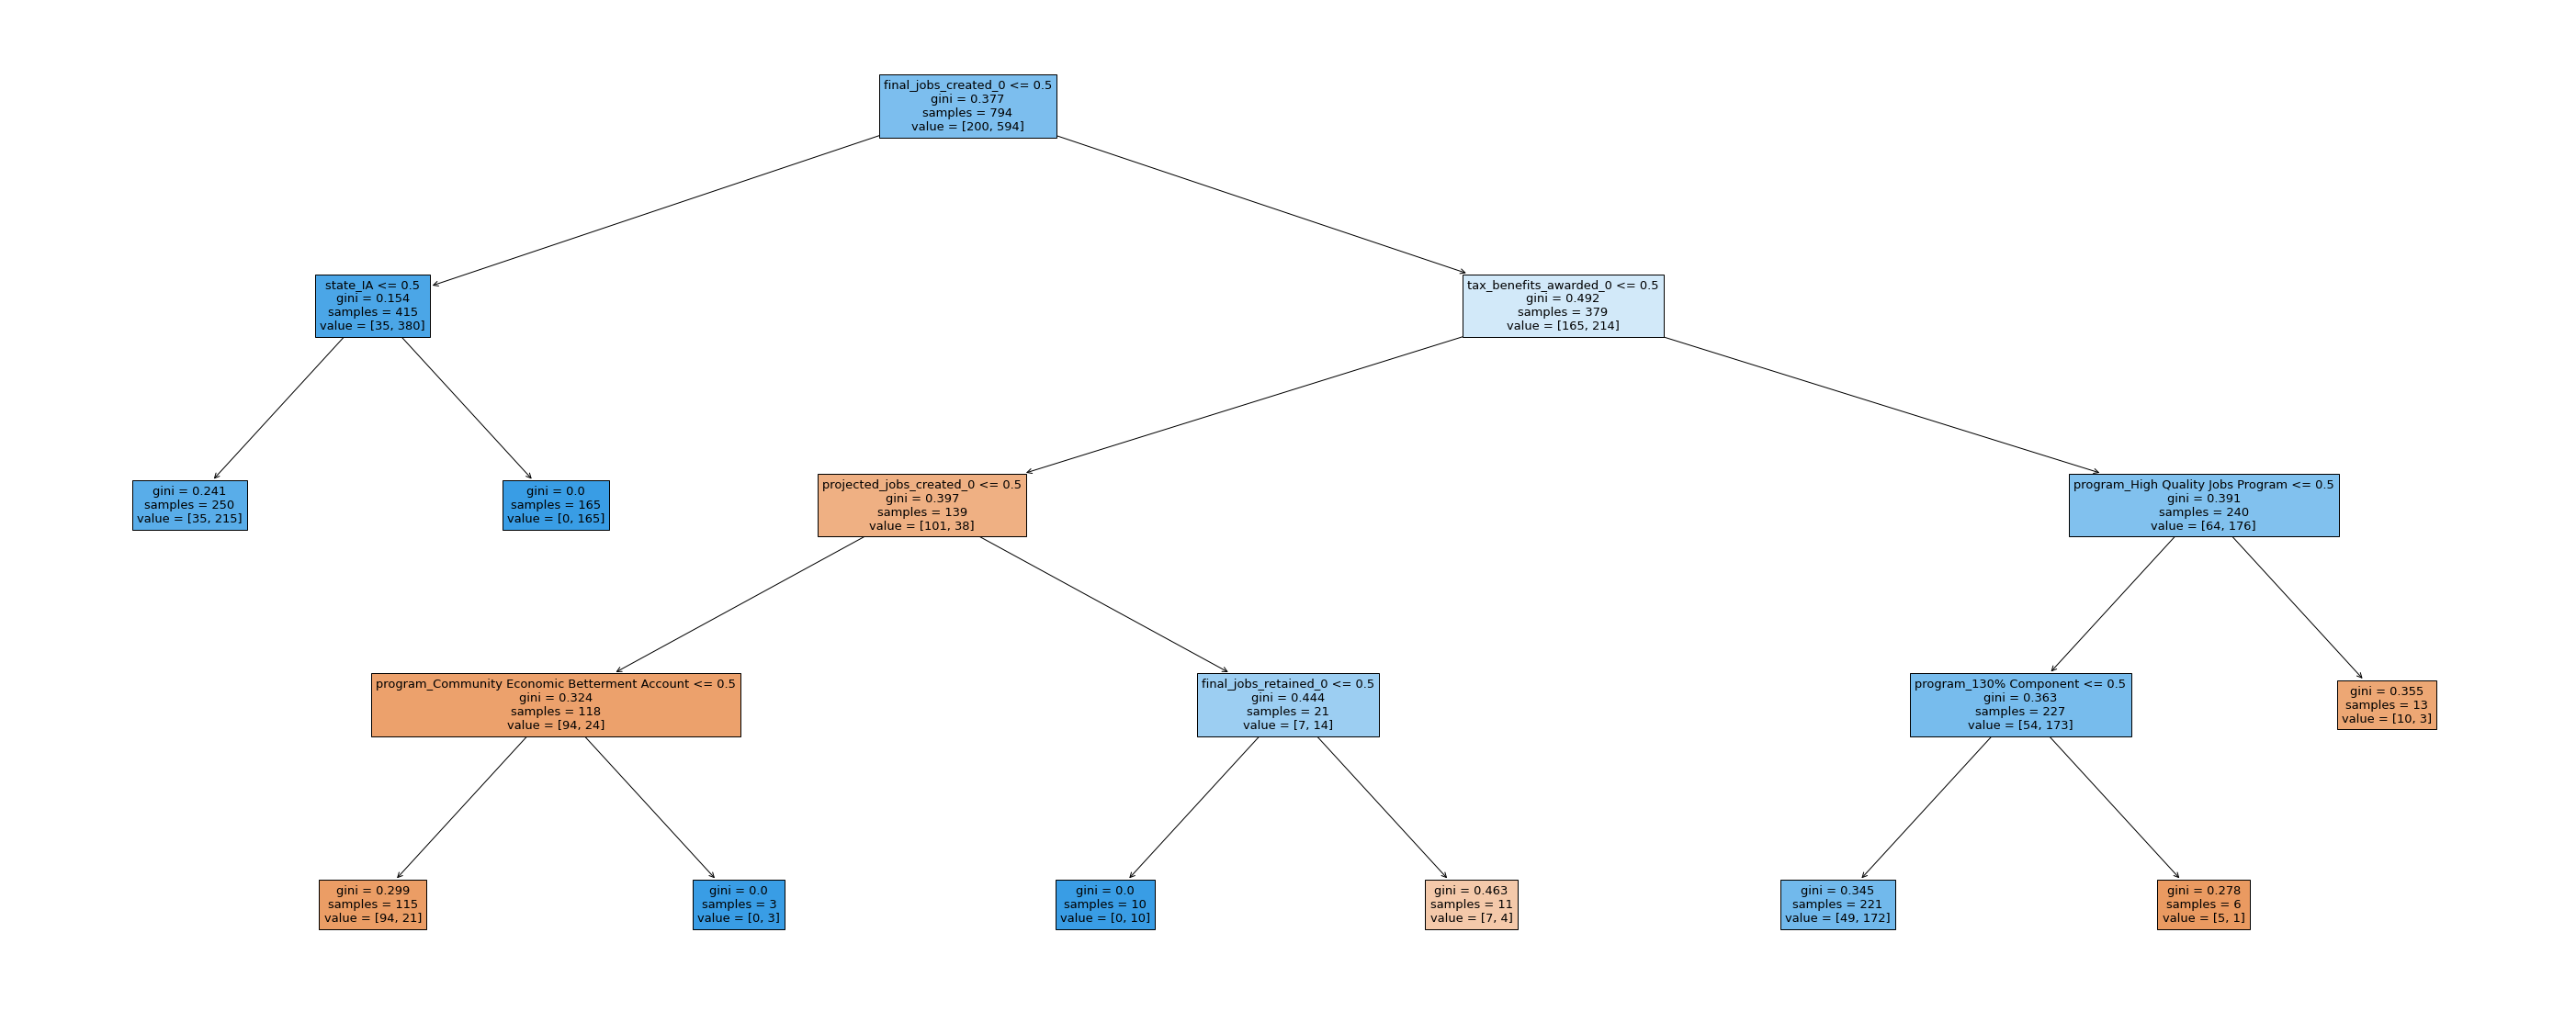

In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Plot figure
plt.figure(figsize=(50,20))
plot_tree(tree_clf2, filled=True, feature_names=cols);

In [32]:
df

,county,state,program,total_project_cost,direct_assistance_awarded,tax_benefits_awarded,company_funding,projected_jobs_created,projected_jobs_retained,final_jobs_created,final_jobs_retained,project_success_failure
0,Polk,IA,130% Component,1750000,225000,0,1750000,16,154,16,90,S
1,Monroe,IA,130% Component,7706860,150000,344047,7706860,3,13,3,13,S
2,Grundy,IA,Value-Added Agriculture Component,415000,60000,0,415000,0,0,0,0,S
3,Cerro Gordo,IA,High Quality Jobs Program,65242000,170000,4200000,65242000,164,0,164,0,S
4,Black Hawk,IA,Community Economic Betterment Account,13030000,350000,893063,11650000,41,0,0,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
966,Rockland,NY,ESG Assistance Program,20205572,2500000,0,17705572,230,686,0,665,P
968,Monroe,NY,ESG Assistance Program,143876118,20000000,0,123876118,39,160,0,140,P
986,Delaware,NY,ESG Assistance Program,10700000,1250000,0,9450000,0,950,119,950,P
1066,Suffolk,NY,ESG Assistance Program,12000000,1400000,0,10600000,12,0,6,0,P
